# ДЗ 1. Машинное обучение

### Камаев Виктор Сергеевич. БИБ 214

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задание 1. Титаник

### 0. Открыть в Pandas файл *titanic.csv*

In [6]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Дропнем колонку `PassengerId`, так как она не является признаком

In [7]:
df = df.drop('PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Какое количество мужчин и женщин ехало на корабле?

За пол пассажира отвечает колонка `Sex`, посмотрим на распределение по ней

In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Видим, что на корабле было 577 мужчин и 314 женщин

### 2. Какой части пассажиров удалось выжить?

За то выжил ли пасажир или нет отвечает колонка `Survived`. 1 - выжил, 0 - нет

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Погибло 549 человек, выжило 342. Теперь посмотрим в процентном соотношении

In [10]:
df['Survived'].value_counts() * 100 / df['Survived'].count()

0    61.616162
1    38.383838
Name: Survived, dtype: float64

61.6% пассажиров погибло, 38.4% выжило

### 3. Класс обслуживания

#### 3.1 Какую долю пассажиры первого класса составляли среди всех пассажиров?

Класс обслуживания пассажиров - колонка `Pclass`. Посмотрим аналогично в процентном соотношении на распределение классов

In [11]:
pclass_distr = df['Pclass'].value_counts()

In [12]:
(pclass_distr * 100 / df['Pclass'].count())[1]

24.242424242424242

То есть 24.2% пассажиров были из первого класса

#### 3.2 Постройте круговую диаграмму по всем классам пассажиров

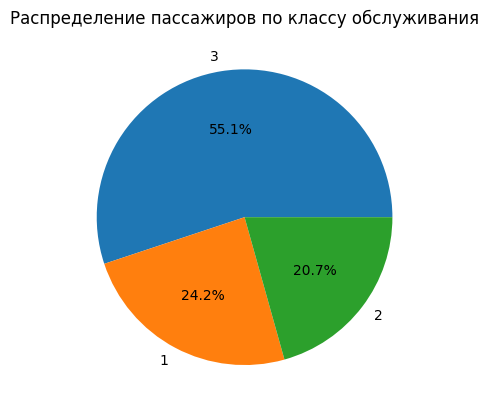

In [13]:
plt.title('Распределение пассажиров по классу обслуживания')
plt.pie(x=pclass_distr, 
        labels=pclass_distr.index, 
        autopct="%.1f%%")

plt.show()

### 4. Какого возраста были пассажиры?

За возраст отвечает колонка `Age`

#### 4.1 Посчитайте среднее и медиану возраста пассажиров.

In [14]:
print("Среднее значение возраста:", df['Age'].mean())
print("Медианное значение возраста:", df['Age'].median())

Среднее значение возраста: 29.69911764705882
Медианное значение возраста: 28.0


#### 4.2 В чем статистическая разница между показателями медианы и среднего?

Разница заключается в том, что **среднее** - среднее арифметическое всех чисел в выборке, то есть сумма всех значений поделенное на их количество

А **медиана** - значение, которое оказалось бы ровно посередине в отсортированной выборке

#### 4.3 Выведите любой перцентиль возраста пассажиров.

In [15]:
df['Age'].quantile(0.75)

38.0

Я вывел значение 75%-ного перцентиля

#### 4.4 Что показывает перцентиль в статистике?

В общем случае $p$-процентный перцентиль случайной величины - значение, которое эта величина не превышает с вероятностью $p$

Говоря проще - это такое значение, которое больше $p$ процентов значений из выборки. Медиана - частный случай перцентиля, а именно 50-процентный перцентиль

Перцентиль считается для определение равномерности распределения выборки. Чем ближе сильно отличающиеся перцентили, тем менее равномерно распределена выборка и наоборот

### 5. Коррелируют ли число братьев/сестер/супругов с числом родителей/детей?

#### 5.1 Посчитайте корреляцию Пирсона между признаками SibSp и Parch

In [16]:
df['SibSp'].corr(df['Parch'], method='pearson')

0.4148376986201551

Получается эти признаки коррелируют на 41.5%

#### 5.2 Что показывает корреляция?

Корреляция - показатель того, насколько два признака сильно зависят друг от друга. Изменяется в диапазоне $[-1.0; 1.0]$

Чем ближе абсолютное значение к 0, тем более независимыми являются признаки

Положительная корреляция - чем больше первый, тем больше второй

Отрицательная корреляция - чем больше первый, тем меньше второй

### 6. Какое самое популярное женское имя на корабле?

В те времена у всех были "титулы" - поэтому можем отталкиваться от них. Посмотрим на самые популярные из них

In [17]:
titles = df['Name'].str.extract('(\s[A-Z][a-z]+\.\s)')

Здесь матчим регекс паттерн - одна буква заглавная, остальные - прописные + точка на конце

Весь этот префикс должен быть окружен пробелами (иначе сокращенные имена тоже могут считаться)

In [18]:
titles.value_counts()

 Mr.           517
 Miss.         182
 Mrs.          125
 Master.        40
 Dr.             7
 Rev.            6
 Major.          2
 Col.            2
 Mlle.           2
 Mme.            1
 Ms.             1
 Capt.           1
 Lady.           1
 Jonkheer.       1
 Don.            1
 Countess.       1
 Sir.            1
dtype: int64

In [19]:
titles.size == df['Name'].size

True

Под регулярку попали все имена. Сделав ресерч по титулам, можно разделить их на женские и мужские.

Но разделение может давать false-positive - с титулом доктор (Dr) и священнослужитель (Rev) могут быть как женщины так и мужчины

In [20]:
female_titles = ['Mrs.', 'Miss.', 'Mlle.', 'Mme.', 'Ms.', 'Lady.', 'Countess.']
male_titles = ['Mr.', 'Master.', 'Major.', 'Jonkheer.', 'Don.', 'Sir.', 'Capt.', 'Rev.', 'Col.', 'Dr.']

Посмотрим насколько отличается мой метод от исходного

In [21]:
female_titles_regex = '.*(' + '|'.join(map(lambda t: t.strip('.'), female_titles)) + ')'

female_full_names = df['Name'][df['Name'].str.match(female_titles_regex)]

female_true_full_names = df[df['Sex'] == 'female']['Name']

print(set(female_true_full_names.index) - set(female_full_names.index))
print(set(female_full_names.index) - set(female_true_full_names.index))

{796}
set()


Видим, что только одно отличие, посмотрим на него

In [22]:
female_true_full_names[796]

'Leader, Dr. Alice (Farnham)'

Как раз то о чем и говорил - доктор может быть как мужчина, так и женщина

Посмотрев руками можно понять, что женское имя идет либо сразу после титула (который оканчивается на точку), либо в скобках (и стоит на первом месте)

Т.к. паттерн с точкой будет матчиться всегда, то если будет матчиться паттерн со скобкой, будем брать его. Иначе берем первое

In [23]:
def extract_female_names(full_names: pd.Series) -> pd.Series:
    regex_with_brackets = '(\([A-Za-z]+)'
    regex_no_brackets = '(\.\s[A-Za-z]+)'

    names1 = full_names.str.extract(regex_no_brackets)[0].str.strip('. ')
    names2 = full_names.str.extract(regex_with_brackets)[0].str.strip('(')
    
    return names1.combine(names2, lambda x, y: x if not isinstance(y, str) else y)

Теперь соберем наработки и выведем самые популярные имена

In [24]:
extract_female_names(female_full_names).value_counts()

Anna          15
Mary          14
Elizabeth     11
Margaret      10
Alice          6
              ..
Hilda          1
Margaretta     1
Miriam         1
Helmina        1
Gerda          1
Name: 0, Length: 177, dtype: int64

Видим, что самое популярное имя - Anna

## Задание 2. Аппроксимация

In [25]:
import scipy

Сначала создадим исходную функцию

In [26]:
def f(x: np.ndarray):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

Далее созадим функцию для получения матрицы СЛУ. На вход получает иксы, на выходе - матрицу, где в каждой строке `i` все степени `x[i]`

In [27]:
def get_matrix(x: np.ndarray):
    l = x.shape[0]
    res = np.zeros((l, l))
    
    for i in range(x.shape[0]):
        res[i] = np.power(x[i], np.arange(l))

    return res

Дальше напишем функцию, которая по массиву коэффицентов $a_0, a_1, ...$ выводит формулу $g(x)$ в удобочитаемом виде. Нужно для графиков

In [28]:
def show_formula(coeffs: np.ndarray) -> str:
    res = f'{round(coeffs[0], 2)}'

    for i in range(1, coeffs.shape[0]):
        res += f' {["+", ""][float(coeffs[i]) < 0]} {round(coeffs[i], 2)}x^{i}'

    return res

Также функцию для рисования графиков

In [29]:
def plot(coeffs: np.ndarray):
    dots = np.arange(1, 15.2, 0.2)

    f_x = f(dots)
    g_x = np.polyval(coeffs[::-1], dots)

    plt.title(f'$g(x) = {show_formula(coeffs)}$')

    plt.plot(dots, f_x, label='f(x)')
    plt.plot(dots, g_x, label='g(x)')

    plt.legend()
    plt.show()

Наконец, сделаем функцию, которая по заданному набору иксов аппроксимирует $f(x)$, выводит график

In [30]:
def approximate(*args):
    x = np.array(args)
    matrix = get_matrix(x)

    a = scipy.linalg.solve(matrix, f(x))

    print('Coeffs:', a)
    plot(a)

Теперь все готово и можно анализировать уровень аппроксимации

### 2 точки

Coeffs: [ 3.43914511 -0.18692825]


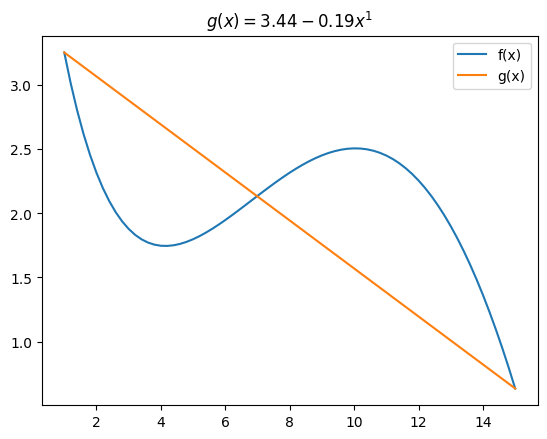

In [31]:
approximate(1, 15)

Так как аппроксимировали по 2 точкам, то получили прямую. Эта прямая совпадает в точках 1, 15 как мы и планировали. Но overall $g(x)$ аппроксимирует плохо

### 3 точки

Coeffs: [ 3.32512949 -0.06531159 -0.00760104]


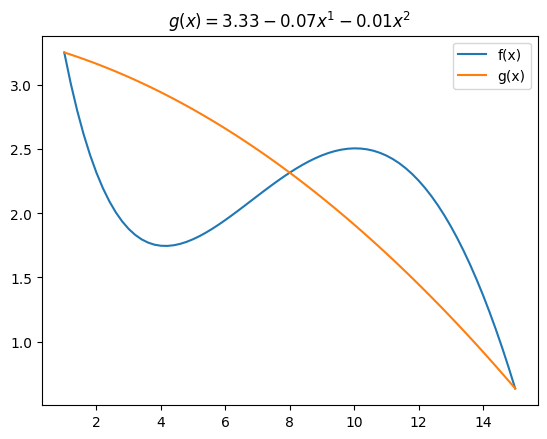

In [32]:
approximate(1, 8, 15)

Здесь видим уже квадратичную функцию $g(x)$.  Она выпуклая на всем интервале и из-за этого хорошо аппроксимирует исходную функцию только ближе к концу. Но это уже лучше чем линейная аппроксимация из 1 пункта

### 4 точки

Coeffs: [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


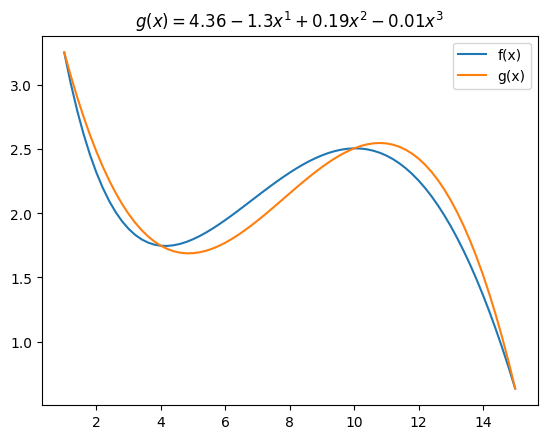

In [33]:
approximate(1, 4, 10, 15)

Здесь видим уже отличный уровень аппроксимации. Полученная $g(x)$ совпадает по характеру с исходной функцией. Точки экстремума немного не там, но аппроксимирующая функция прекрасно повторило поведение исходной (по крайней мере на данном интвервале)

Аппроксимация применяется тогда, когда мы хотим восстановить исходную функцию по данным точкам. К примеру, функция сложно вычислимая, но у нас есть датасет с экспериментальными данными. С помощью аппроксимации мы можем получить аппроксимирующую функцию и эстра/интерполировать ее, получив значение функции в желаемой точке

Фактически аппроксимация - решение задачи линейной регрессии. Мы по исходному набору данных строим модель(функцию), которая сможет по любым объектам (точкам) дать предсказание (интер/экстраполировать)

Для оценки качества линейных моделей самыми популярными метриками являются MSE, MAE, RMSE, MAPE. Все они считают отклонение (квадратичное/по модулю) отклонение в заранее выбранных точках, затем суммируют их. Чем меньше сумма отклонений, тем качественней модель, а в нашем случае аппроксимация

Для примера можем посчитать MSE (стандартное квадратичное отклонение) для последней функции

In [35]:
def mse(y_pred: np.ndarray, y_true: np.ndarray) -> float:
    return np.mean(np.square(y_pred - y_true))

In [38]:
g_x_coeffs = np.array([ 4.36264154, -1.29552587, 0.19333685, -0.00823565]) # из подписи над графиком

dots = np.arange(1, 15.1, 0.1)

f_x = f(dots)
g_x = np.polyval(g_x_coeffs[::-1], dots)

mse(f_x, g_x)

0.018435546414390196

MSE очень хорошее -> функция аппроксимирована тоже хорошо